In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

MARCHA ALEATORIA EN UNA DIMENSIÓN

Punto 7. Simulación marcha aleatoria

In [30]:
a = float(input("Ingresa la longitud del paso a: "))
N = int(input("Ingresa el número de pasos N: "))
repeticiones = int(input("Ingresa el número de repeticiones: "))

In [31]:
def simulacion_marcha_aleatoria(a,N):

    pasos = np.random.choice([-a,a], size = N)

    posicion_x_final = np.sum(pasos)

    return posicion_x_final

posiciones_de_x = [simulacion_marcha_aleatoria(a, N) for _ in range(repeticiones)]

Gráfica

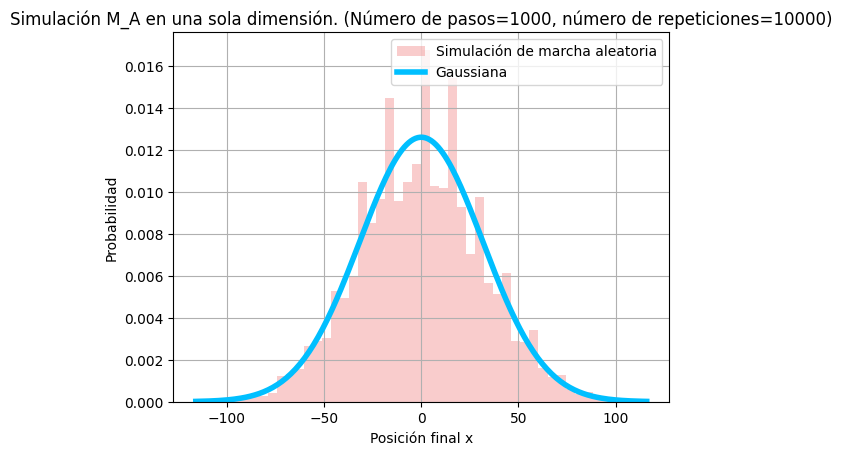

In [32]:
plt.hist(posiciones_de_x, bins = 50, density = True, alpha = 0.4, color='lightcoral', label = "Simulación de marcha aleatoria")

media_g = 0
desviacion_estandar_g = a * np.sqrt(N)
valores_de_x = np.linspace(min(posiciones_de_x), max(posiciones_de_x), 200)
gaussiana = norm.pdf(valores_de_x, media_g, desviacion_estandar_g)

plt.plot(valores_de_x, gaussiana, 'deepskyblue', lw = 4, label="Gaussiana")

plt.title(f"Simulación M_A en una sola dimensión. (Número de pasos={N}, número de repeticiones={repeticiones})")
plt.xlabel("Posición final x")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.savefig("Simulación marcha aleatoria punto 7.png", dpi=300, bbox_inches='tight')
plt.show()



Punto 8.

In [33]:
diferentes_N = [100, 1000, 10000, 100000]
repeticiones_fijas = 100000

media_x_N=[]
media_x2_N = []

for paso in diferentes_N:

    posiciones_x_N = [simulacion_marcha_aleatoria( a, paso) for _ in range(repeticiones_fijas)]
    posiciones_x_N = np.array(posiciones_x_N)

    promedio_x = np.mean(posiciones_x_N)
    media_x_N.append(promedio_x)


    promedio_x2 = np.mean(posiciones_x_N ** 2)
    media_x2_N.append(promedio_x2)

print(f"Los valores promedio de x en los diferentes número de pasos fueron: {media_x_N}")
print(f"Los valores promedio de x^2 en los diferentes número de pasos fueron: {media_x2_N}")

Los valores promedio de x en los diferentes número de pasos fueron: [np.float64(0.0505), np.float64(0.18676), np.float64(-0.3098), np.float64(-2.19982)]
Los valores promedio de x^2 en los diferentes número de pasos fueron: [np.float64(99.68244), np.float64(1006.38264), np.float64(9980.80784), np.float64(99226.01628)]


Gráfica <x^2> vs N junto con la estimación de la constante de difusión D

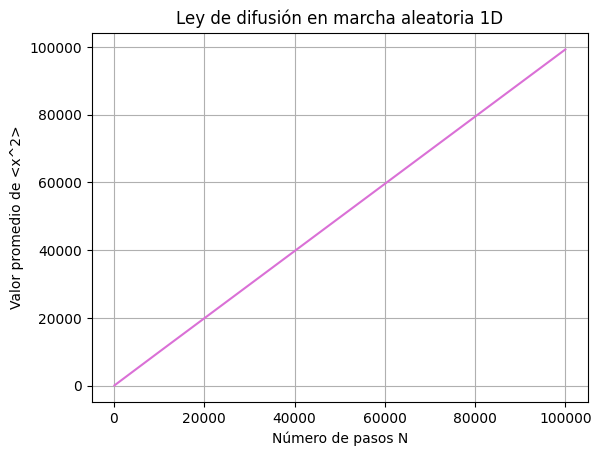

In [34]:
plt.plot(diferentes_N, media_x2_N, 'orchid', label=" <x^2>")
plt.xlabel("Número de pasos N")
plt.ylabel("Valor promedio de <x^2>")
plt.title("Ley de difusión en marcha aleatoria 1D")
plt.grid(True)
plt.savefig("Proporcionalidad x_2 y N, punto 8.png", dpi=300, bbox_inches='tight')
plt.show()

Como es una línea recta, podemos hacer una regresión lineal para obtener la pendiente y de esta forma hallar la constante de Difusión.

In [35]:
coef = np.polyfit(diferentes_N, media_x2_N, 1)
m = coef[0]
b = coef[1]
D = m / 2

print(f"La constante de difusión (D) estimada es = {D:.3f}")

La constante de difusión (D) estimada es = 0.496
